In [1]:
## Please find below the Project 2 for Unsupervised Learning course.

#The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, 
#using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
# Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet
# van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, 
# van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
# The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. 
# The vehicle may be viewed from one of many different angles.

In [2]:
# Question 1 : 
#  Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore 
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

vehiclesdf = pd.read_csv("vehicle.csv") # Load data
vehiclesdf.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
vehiclesdf.info() 
# Take Away :
# There are missing values in few features.
# Features are mostly int or float type except for Class feature which needs to be encoded.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
vehiclesdf.isna().sum()
# displays number of missing values in each corresponding feature.

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [5]:
# To see how these missing values can be replaced/ treated,understanding the distribution of each feature.
vehiclesdf.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [6]:
vehiclesdf = vehiclesdf.fillna(value = vehiclesdf.median(),axis = 0) # filling empty data points with corresponding feature Median
vehiclesdf.isna().sum() # Checking to make sure there are no more missing values.

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
vehiclesdf.describe() # verifying the data distribution after median imputation. 
# data distribution mostly remains same.

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.823877,82.100473,168.874704,61.677305,8.567376,168.887707,40.936170,20.580378,147.998818,188.596927,439.314421,174.706856,72.443262,6.361702,12.600473,188.918440,195.632388
std,8.234474,6.134272,15.741569,33.401356,7.882188,4.601217,33.197710,7.811882,2.588558,14.515652,31.360427,176.496341,32.546277,7.468734,4.903244,8.930962,6.152247,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.250000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.750000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


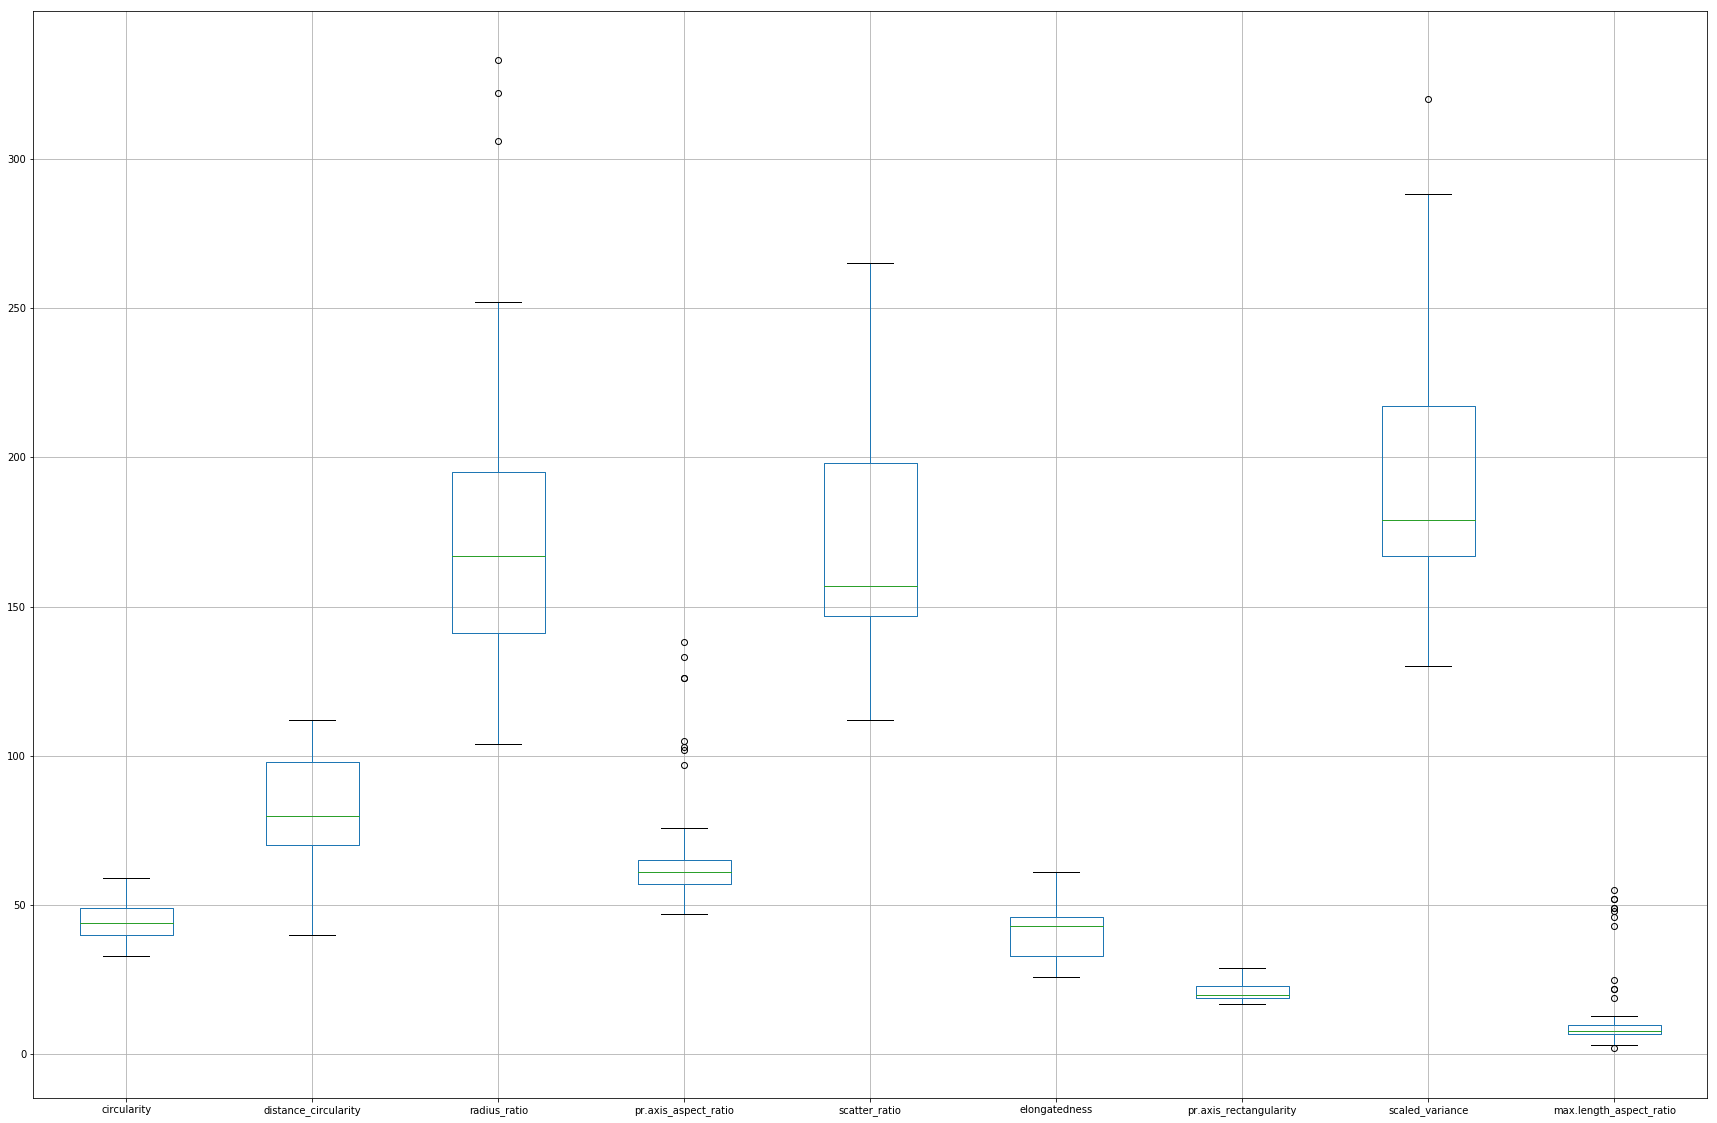

In [8]:
# plotting outliers

vehiclesdf.boxplot(column = ['circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','scaled_variance','max.length_aspect_ratio'],figsize = (30,20))

# There are outliers in Radius ratio, pr.axis_aspect_ratio, scaled_variance & max.length_aspect_ratio

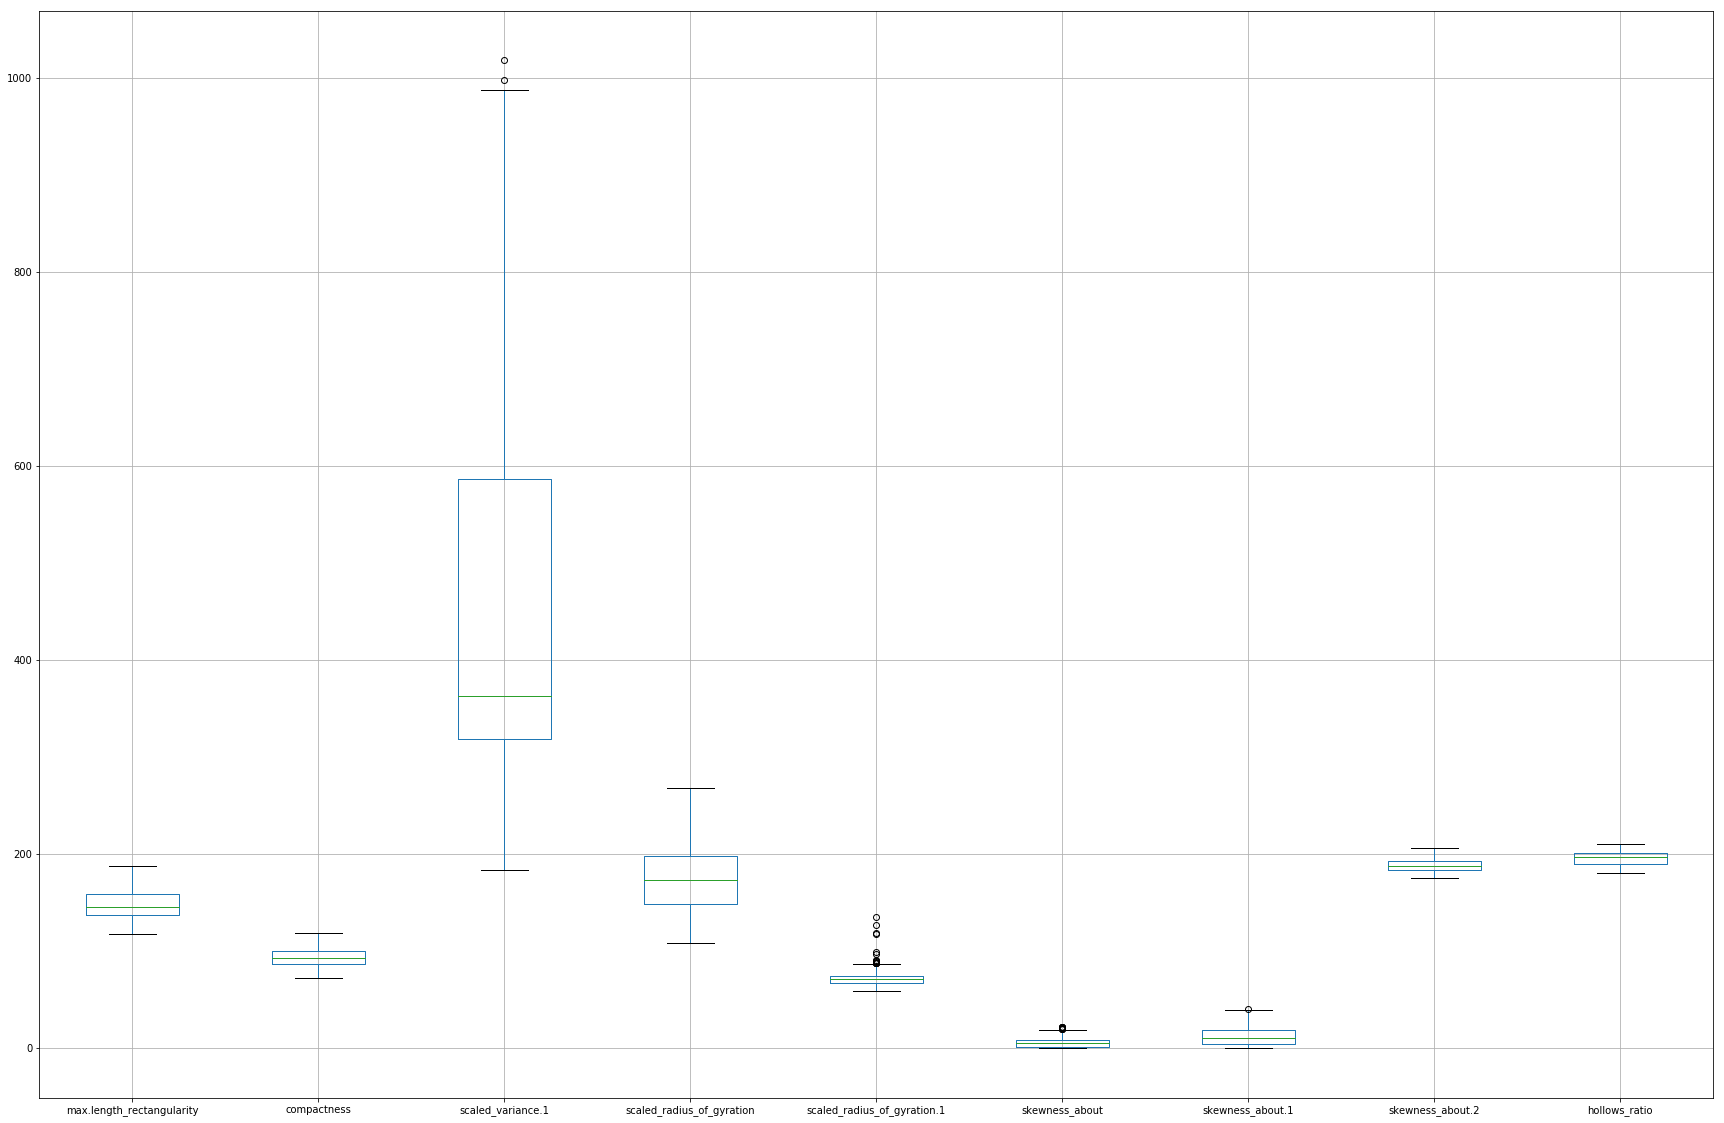

In [9]:
vehiclesdf.boxplot(column = ['max.length_rectangularity','compactness','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio'],figsize = (30,20))

# There are outliers in scaled_variance.1, scaled_radius_of_gyration.1, skewness_about, skewness_about.1

In [10]:
# Handling outliers

# We see more number of outliers in scaled_radius_of_gyration.1, skewness_about, pr.axis_aspect_ratio & max.length_aspect_ratio
# features. So, handling these outliers by capping & flooring.  

# handling outlier for scaled_radius_of_gyration.1 feature
s_q3 = vehiclesdf["scaled_radius_of_gyration.1"].quantile(0.75)
s_q1 = vehiclesdf["scaled_radius_of_gyration.1"].quantile(0.25)
s_iqr = s_q3-s_q1 # find out iqr for scaled_radius_of_gyration.1 feature
print("s_iqr:",s_iqr)
s_upper_cutoff = s_q3+ 1.5*s_iqr
s_lower_cutoff = s_q1-1.5*s_iqr
print("s_upper cutoff:",s_upper_cutoff)
print("s_lower cutoff:",s_lower_cutoff)

#capping outlier at upper cutoff for scaled_radius_of_gyration.1 feature
vehiclesdf["scaled_radius_of_gyration.1"] = vehiclesdf["scaled_radius_of_gyration.1"].where(vehiclesdf["scaled_radius_of_gyration.1"]<s_upper_cutoff,s_upper_cutoff)


# handling outlier for skewness_about feature
sk_q3 = vehiclesdf["skewness_about"].quantile(0.75)
sk_q1 = vehiclesdf["skewness_about"].quantile(0.25)
sk_iqr = sk_q3-sk_q1 # find out iqr for skewness_about feature
print("sk_iqr:",sk_iqr)
sk_upper_cutoff = sk_q3+ 1.5*sk_iqr
sk_lower_cutoff = sk_q1-1.5*sk_iqr
print("sk_upper cutoff:",sk_upper_cutoff)
print("sk_lower cutoff:",sk_lower_cutoff)

#capping outlier at upper cutoff for skewness_about feature
vehiclesdf["skewness_about"] = vehiclesdf["skewness_about"].where(vehiclesdf["skewness_about"]<sk_upper_cutoff,sk_upper_cutoff)


# handling outlier for pr.axis_aspect_ratio feature
pr_q3 = vehiclesdf["pr.axis_aspect_ratio"].quantile(0.75)
pr_q1 = vehiclesdf["pr.axis_aspect_ratio"].quantile(0.25)
pr_iqr = pr_q3-pr_q1 # find out iqr for pr.axis_aspect_ratio feature
print("pr_iqr:",pr_iqr)
pr_upper_cutoff = pr_q3+ 1.5*pr_iqr
pr_lower_cutoff = pr_q1-1.5*pr_iqr
print("pr_upper cutoff:",pr_upper_cutoff)
print("pr_lower cutoff:",pr_lower_cutoff)

#capping outlier at upper cutoff for pr.axis_aspect_ratio feature
vehiclesdf["pr.axis_aspect_ratio"] = vehiclesdf["pr.axis_aspect_ratio"].where(vehiclesdf["pr.axis_aspect_ratio"]<pr_upper_cutoff,pr_upper_cutoff)


# handling outlier for max.length_aspect_ratio feature
mr_q3 = vehiclesdf["max.length_aspect_ratio"].quantile(0.75)
mr_q1 = vehiclesdf["max.length_aspect_ratio"].quantile(0.25)
mr_iqr = mr_q3-mr_q1 # find out iqr for max.length_aspect_ratio feature
print("mr_iqr:",mr_iqr)
mr_upper_cutoff = mr_q3+ 1.5*mr_iqr
mr_lower_cutoff = mr_q1-1.5*mr_iqr
print("mr_upper cutoff:",mr_upper_cutoff)
print("mr_lower cutoff:",mr_lower_cutoff)

#capping outlier at upper cutoff for max.length_aspect_ratio feature
vehiclesdf["max.length_aspect_ratio"] = vehiclesdf["max.length_aspect_ratio"].where(vehiclesdf["max.length_aspect_ratio"]<mr_upper_cutoff,mr_upper_cutoff)


s_iqr: 8.0
s_upper cutoff: 87.0
s_lower cutoff: 55.0
sk_iqr: 7.0
sk_upper cutoff: 19.5
sk_lower cutoff: -8.5
pr_iqr: 8.0
pr_upper cutoff: 77.0
pr_lower cutoff: 45.0
mr_iqr: 3.0
mr_upper cutoff: 14.5
mr_lower cutoff: 2.5


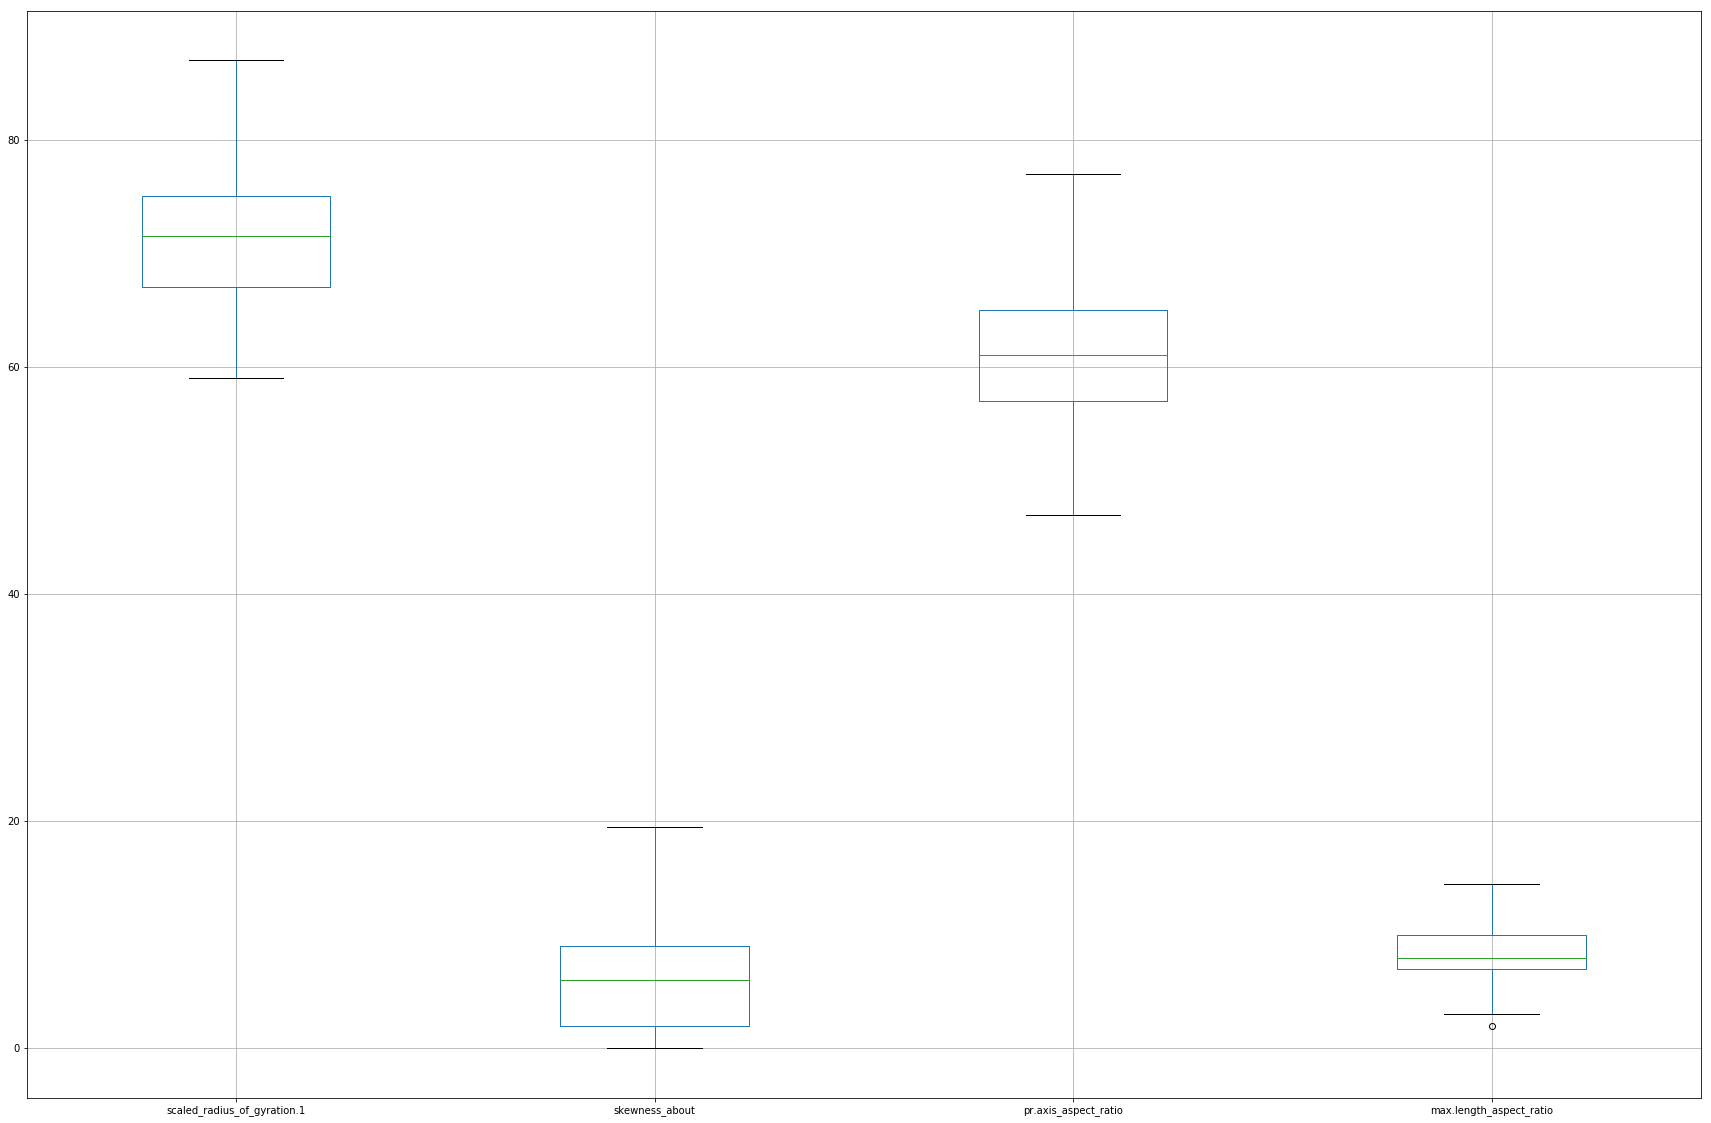

In [11]:
# box plotting post handling outliers. There are no more significant outliers present.

vehiclesdf.boxplot(column = ['scaled_radius_of_gyration.1','skewness_about','pr.axis_aspect_ratio','max.length_aspect_ratio'],figsize = (30,20))

In [12]:
# Question 2: 
# Understanding the attributes - Find relationship between different attributes (Independent variables) and 
# choose carefully which all attributes have to be a part of the analysis and why.

In [13]:
# convert class feature to a numeric variable using label encoding method. 

vehiclesdf["class"] = LabelEncoder().fit_transform(vehiclesdf["class"]) # converted to numeric values
corr = vehiclesdf.corr() # Correlation matrix
corr

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.684887,0.789928,0.689743,0.166905,0.437265,0.812620,-0.788750,0.813694,0.676143,0.762070,0.814012,0.585243,-0.263751,0.233761,0.157015,0.298537,0.365552,-0.033796
circularity,0.684887,1.000000,0.792320,0.620912,0.197870,0.524022,0.847938,-0.821472,0.843400,0.961318,0.796306,0.835946,0.925816,0.056482,0.144552,-0.011439,-0.104426,0.046351,-0.158910
distance_circularity,0.789928,0.792320,1.000000,0.767035,0.228494,0.611365,0.905076,-0.911307,0.893025,0.774527,0.861519,0.886017,0.705771,-0.247726,0.113352,0.265547,0.146098,0.332732,-0.064467
radius_ratio,0.689743,0.620912,0.767035,1.000000,0.680902,0.501957,0.734429,-0.789481,0.708385,0.568949,0.793415,0.718436,0.536372,-0.311186,0.047118,0.173741,0.382214,0.471309,-0.182186
pr.axis_aspect_ratio,0.166905,0.197870,0.228494,0.680902,1.000000,0.230551,0.173201,-0.275304,0.142643,0.149545,0.241258,0.156732,0.148468,-0.246665,-0.057076,-0.027450,0.368533,0.389627,-0.182524
max.length_aspect_ratio,0.437265,0.524022,0.611365,0.501957,0.230551,1.000000,0.439697,-0.457058,0.435037,0.608703,0.416973,0.398307,0.374298,-0.257539,0.084540,0.129515,0.055799,0.372214,0.336517
scatter_ratio,0.812620,0.847938,0.905076,0.734429,0.173201,0.439697,1.000000,-0.971601,0.989751,0.809083,0.948662,0.993012,0.799875,-0.012569,0.073986,0.212428,0.005628,0.118817,-0.288895
elongatedness,-0.788750,-0.821472,-0.911307,-0.789481,-0.275304,-0.457058,-0.971601,1.000000,-0.948996,-0.775854,-0.936382,-0.953816,-0.766314,0.102532,-0.052501,-0.185053,-0.115126,-0.216905,0.339344
pr.axis_rectangularity,0.813694,0.843400,0.893025,0.708385,0.142643,0.435037,0.989751,-0.948996,1.000000,0.810934,0.934227,0.988213,0.796690,0.003542,0.083198,0.214700,-0.018649,0.099286,-0.258481
max.length_rectangularity,0.676143,0.961318,0.774527,0.568949,0.149545,0.608703,0.809083,-0.775854,0.810934,1.000000,0.744985,0.794615,0.866450,0.044230,0.136283,0.001366,-0.103948,0.076770,-0.032399


In [14]:
#Inference :
 
# we observe here a strong multi colinearity across features(indpenedent variables) and another interetsing observation is ,
# mostly none of the indpendent variables are strong predictors of target variable.

# Below is the list of features which are highly positively corelated. 
#1. Circularity & max.length_rectangularity are corelated at 96%.
#2. Circularity & scaled_radius_of_gyration are corelated at 92%.
#3. distance_circularity & scatter_ratio are corelated at 90%.
#4. pr.axis_rectangularity & scatter_ratio are co realted at 98%
#5. scaled_variance & scatter_ratio are co realted at 94%
#6. scaled_variance.1 & scatter_ratio are co realted at 99%
#7. pr.axis_rectangularity ,scaled_variance &  scaled_variance.1 are highly corelated at around 93% & 98% respectively.
#8. scaled_variance & scaled_variance.1 are corelated at 94%

# There are few highly negatively colinear features too. 
#1. elongatedness & distance_circularity are corelated at -91%
#2. scatter_ratio & elongatedness are corelated at -97%
#3. pr.axis_rectangularity & elongatedness are corelated at -94%
#4. scaled_variance & elongatedness are corelated at -93%
#5. scaled_variance.1 & elongatedness are corealted at -95%
#6. scaled_radius_of_gyration.1 & hollows_ratio are corelated at -90%

# Approach1 would be to remove least colinear features & feed only mostly colinear features to PCA.
# Aprroarch 2 is based on above observation of colinearity between input vataibles and since we are doing PCA in next step, we can keep all 
# colinear features & derive principal components out of these.  We will try both the approaches to see if it brings any changes to model accuracy.

# Features dropped for Approach 1
vehiclesdf_attr = vehiclesdf.drop(labels = ["pr.axis_aspect_ratio","skewness_about.1","skewness_about","max.length_aspect_ratio"], axis = 1)
vehiclesdf_attr.shape


(846, 15)

C:\Users\Aadee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Aadee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


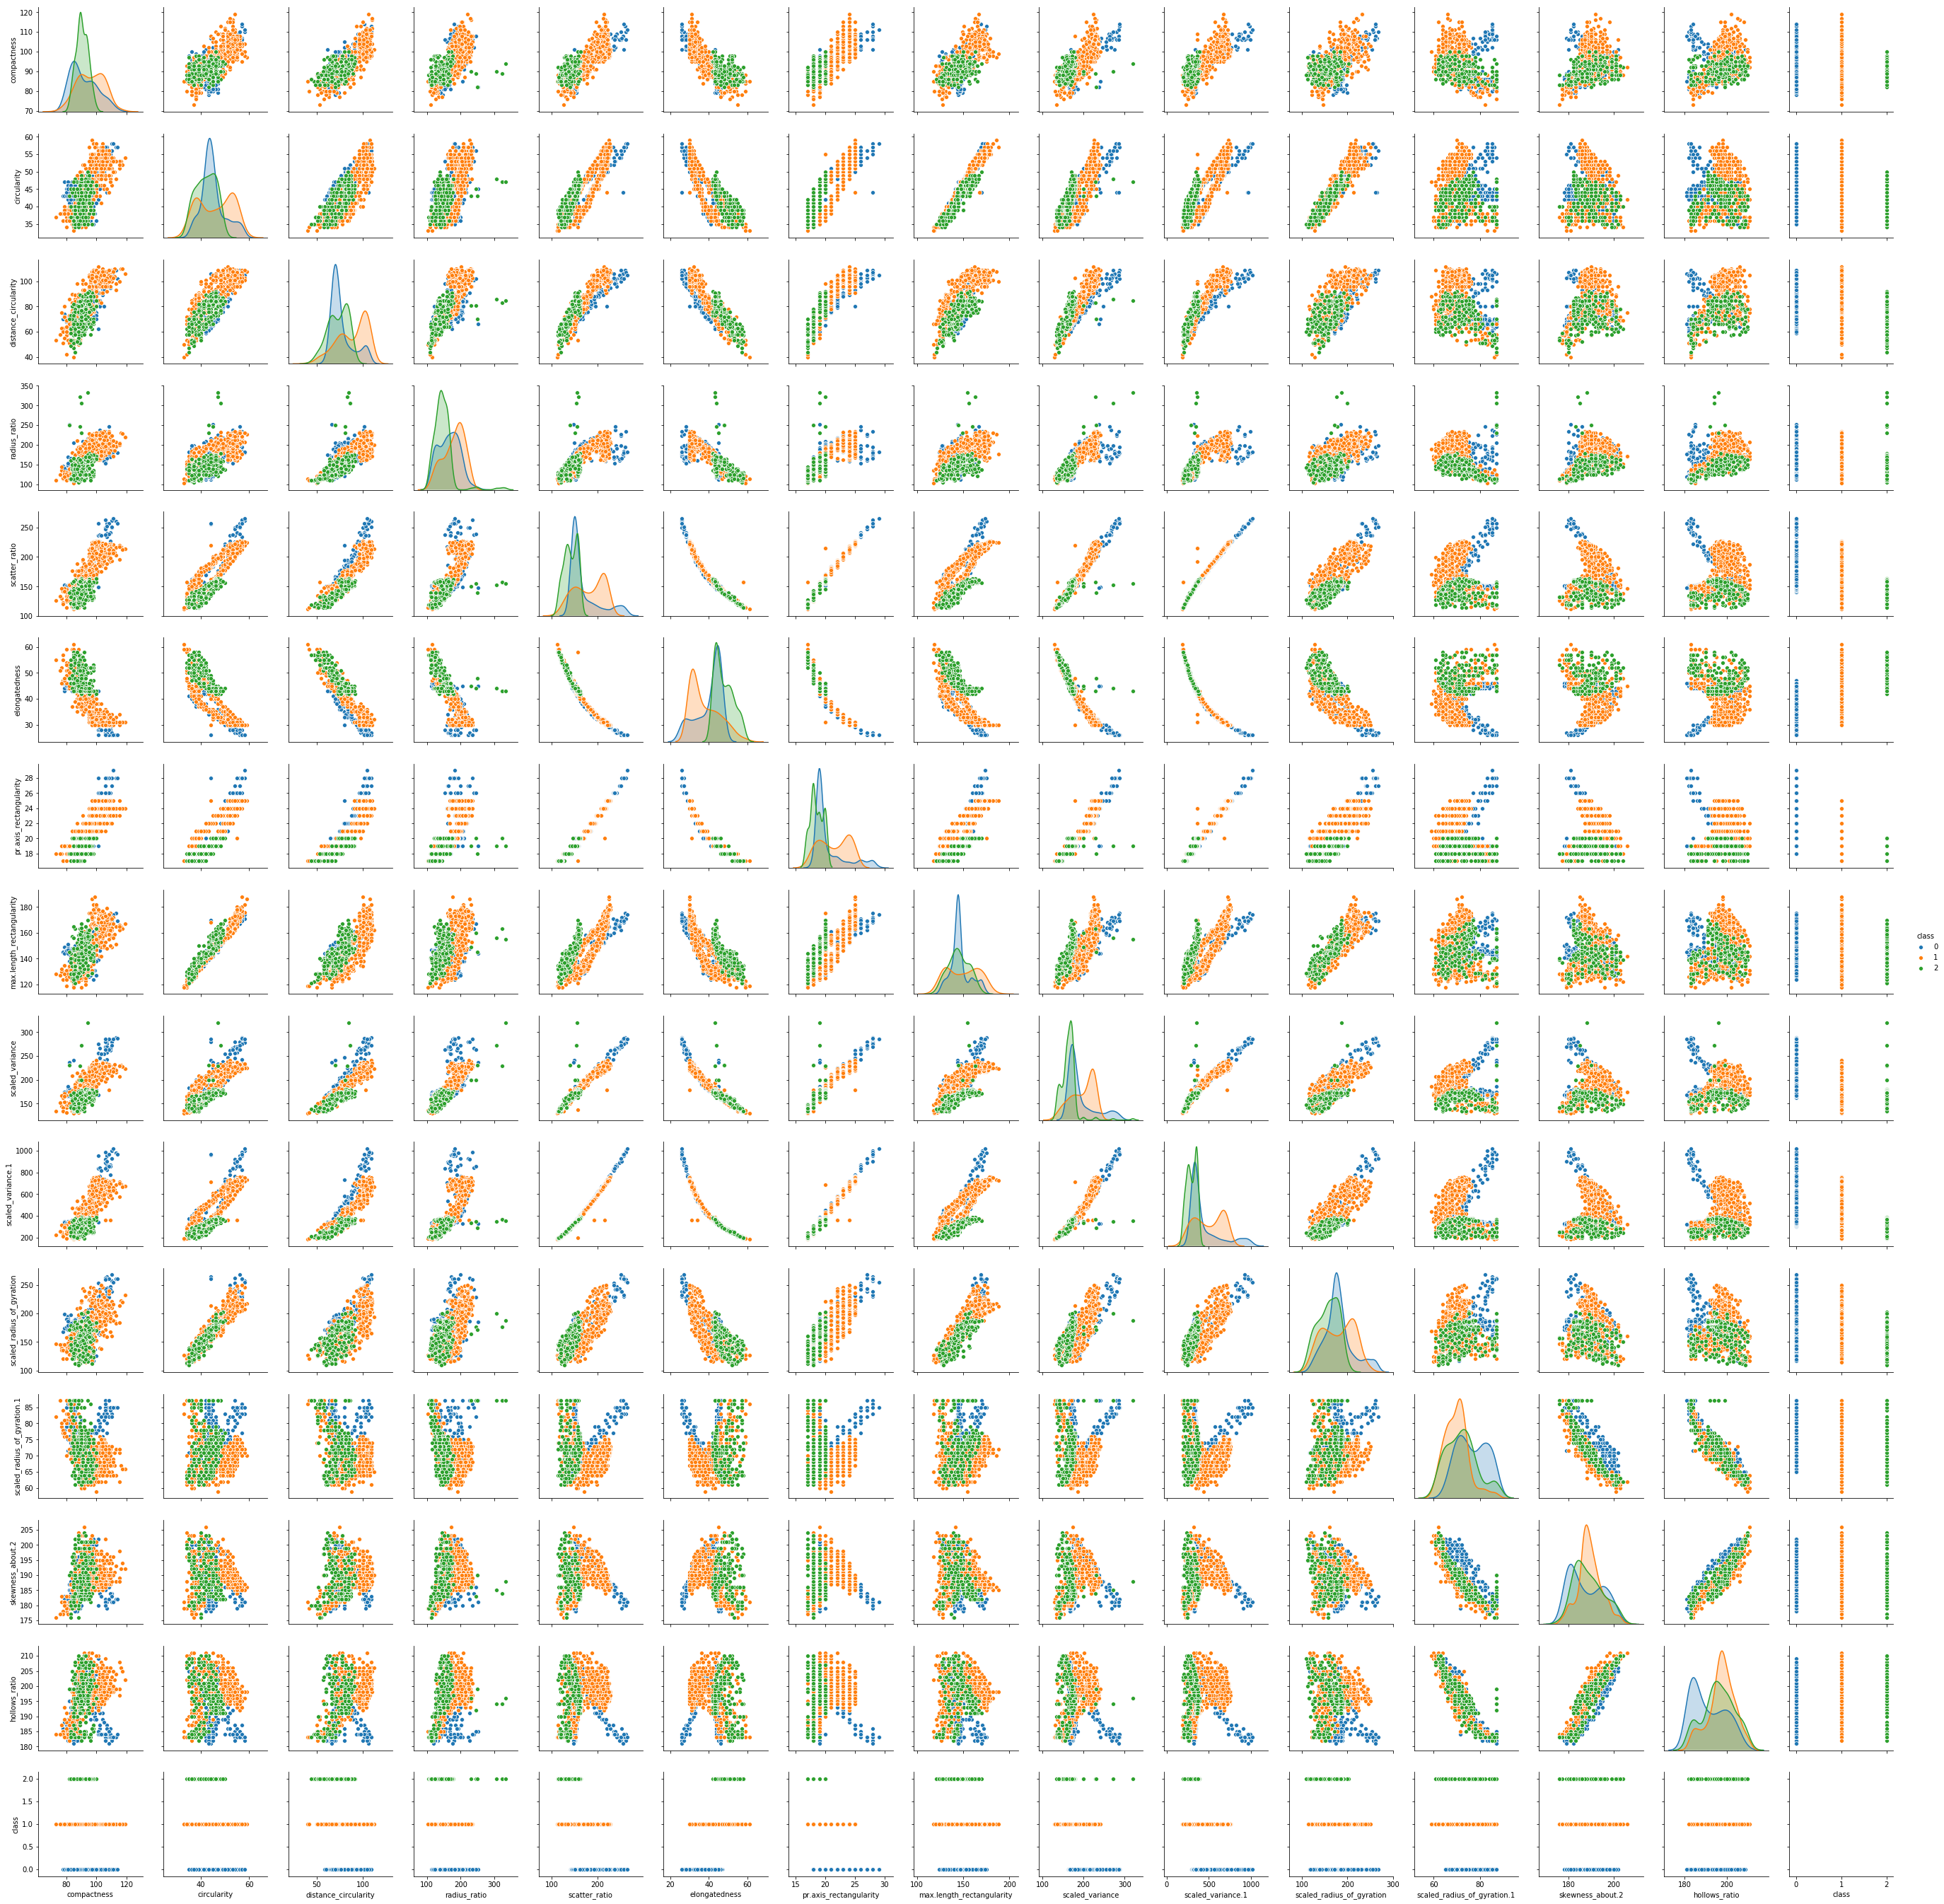

In [15]:
#Let us check for pair plot of new dataframe with relevant features only

sns.pairplot(vehiclesdf_attr, diag_kind='kde',hue = 'class') # plotting pairplot

In [16]:
# Take away from pairplot 
#1. We see clusters within classes.
#2. Data still has  colinear features which will be fed to PCA

In [17]:
# Question 3 :
# Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)

In [18]:
# Approach 1 - To find out the model accuracy post manually dropping least colinear features. 

#Standardising data before performaing PCA
vehiclesdf_attr = vehiclesdf_attr.drop("class",axis = 1) # dropping target variable
vehiclesdf_attr_std = StandardScaler().fit_transform(vehiclesdf_attr)

# Finding eigen values to plot elbow plot to find out number of Principal components which contribute to more than 95% of the variance.

# Step 1 - Create covariance matrix
cov_matrix = np.cov(vehiclesdf_attr_std.T)

# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

#step 3 : find total eigen values & cumulative variance explained
tot = sum(eig_vals)
print("Total eigen values",tot)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

# Inference :
# first 7 PCs are contributing to more than 95% of variance in data.

Total eigen values 14.016568047337298
[65.905967462992, 21.96458840725633, 4.155388691713278, 2.4697654485460174, 1.829353815123199, 1.2025764979153928, 0.7969615440421854, 0.5216223391743218, 0.37910248803927044, 0.30058591850131666, 0.22545724199875294, 0.15295772312197228, 0.0731084142990565, 0.022564007276900295]
Cumulative Variance Explained [ 65.90596746  87.87055587  92.02594456  94.49571001  96.32506383
  97.52764032  98.32460187  98.84622421  99.22532669  99.52591261
  99.75136986  99.90432758  99.97743599 100.        ]


C:\Users\Aadee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aadee\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


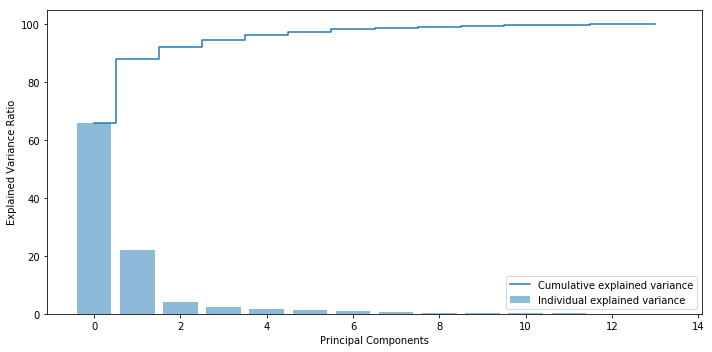

In [19]:
# plotting elbow plot
plt.figure(figsize=(10 ,5))
plt.bar(range(14), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(14), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#Inference : 
# first 7 prinicipal components contributes to more than 95% of variance as mentioned in question #2.So, considering 7
# componenets only in further calculations.Number of features reduced from 14 to 7.

In [20]:
# using PCA to determine first set of principal components & map back to original data frame
from sklearn import decomposition
pca1 = decomposition.PCA(n_components=7)
pca1.fit(vehiclesdf_attr_std)
X = pca1.transform(vehiclesdf_attr_std)
vehiclesdf_pca1 = pd.DataFrame(X)
vehiclesdf_pca1.head(5) 
# This data frame has the original data points in terms of 7 principal components.

,0,1,2,3,4,5,6
0,0.183067,0.055644,-1.068850,0.180395,0.042576,0.606917,-0.089659
1,-1.601825,0.403722,-0.241021,-0.388892,-0.313034,0.172089,0.142738
2,3.689374,-0.258254,0.259527,0.127897,0.029532,0.257813,-0.585304
3,-1.756420,2.946085,-0.365501,-0.408030,-0.107197,0.184973,0.530778
4,-0.722111,-2.946854,1.062933,2.263038,0.672365,0.477540,-0.154038


In [21]:
#Approach 2 to derive second set of principal components by providing all 18 features from original data set as an input to PCA.
# Assumption here is that there will be less of data loss & better model prediction.

#Standardising data before performing PCA
vehiclesdf_attr2 = vehiclesdf.drop("class",axis = 1) # dropping target variable
vehiclesdf_attr2_std = StandardScaler().fit_transform(vehiclesdf_attr2)

# Finding eigen values to plot elbow plot to find out number of Principal components which contribute to 95% of the variance.

# Step 1 - Create covariance matrix
cov_matrix2 = np.cov(vehiclesdf_attr2_std.T)

# Step 2- Get eigen values and eigen vector
eig_vals2, eig_vecs2 = np.linalg.eig(cov_matrix2)

#step 3 : find total eigen values & cumulative variance explained
tot2 = sum(eig_vals2)
print("Total eigen values",tot2)
var_exp2 = [( i /tot2 ) * 100 for i in sorted(eig_vals2, reverse=True)]
print(var_exp2)
cum_var_exp2 = np.cumsum(var_exp2)
print("Cumulative Variance Explained", cum_var_exp2)

# Inference :
# first 7 PCs are contributions to more than 95% of variance in data.

Total eigen values 18.021301775147943
[53.61950975260184, 18.305296935616045, 6.640462222331546, 6.523034810336198, 4.841757018510013, 4.153236745672585, 1.9317258349334607, 1.2248352563944864, 0.7745880226429869, 0.5613815802881209, 0.3623520325569871, 0.34664319061486354, 0.2364450051056992, 0.17574656460000176, 0.1196863837209321, 0.1110697615070138, 0.05578667054720379, 0.016442212020011913]
Cumulative Variance Explained [ 53.61950975  71.92480669  78.56526891  85.08830372  89.93006074
  94.08329749  96.01502332  97.23985858  98.0144466   98.57582818
  98.93818021  99.2848234   99.52126841  99.69701497  99.81670136
  99.92777112  99.98355779 100.        ]


C:\Users\Aadee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aadee\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


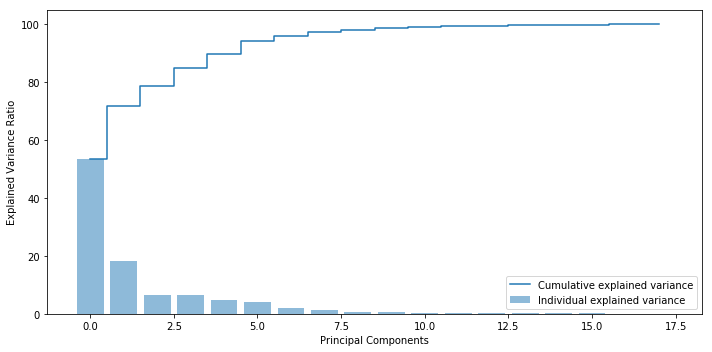

In [22]:
# plotting elbow plot
plt.figure(figsize=(10 ,5))
plt.bar(range(18), var_exp2, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(18), cum_var_exp2, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#Inference : 
# first 7 prinicipal components contributes to more than 95% of variance as mentioned in question #2.Still considering 10 PCs 
# in further calculations.Reduced 18 features to 10.

In [23]:
# using PCA to determine second set of principal components and map back to original data frame

pca1 = decomposition.PCA(n_components=10)
pca1.fit(vehiclesdf_attr2_std)
X = pca1.transform(vehiclesdf_attr2_std)
vehiclesdf_pca2 = pd.DataFrame(X)
vehiclesdf_pca2.head(5) 
# This data frame has the original data points in terms of 10 principal components

,0,1,2,3,4,5,6,7,8,9
0,0.533006,-0.619750,-0.809894,0.932316,-1.061106,1.065772,-0.637458,-0.542691,-0.779065,-0.089409
1,-1.525450,-0.385517,0.113360,-1.070078,-0.677279,0.063091,0.201647,0.153874,0.135523,-0.027538
2,3.863220,0.198412,-1.069027,-0.548561,0.451201,0.962961,0.604630,0.311192,-0.240492,0.357518
3,-1.577790,-3.006099,-0.311273,-0.301600,-0.460578,-0.625544,0.146378,-0.148035,-0.063030,-0.482889
4,0.040469,1.734140,-1.703106,2.426602,-1.801274,3.422389,1.696793,-0.075705,1.280975,0.542239


In [24]:
#Question 4 :
# Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and 
# find out the best hyper parameters and do cross validation to find the accuracy. 

In [26]:
# Performing SVC & gridserach CV using first set of principal components.

#Split data in train & test
X1 = vehiclesdf_pca1
Y1 = vehiclesdf["class"]
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.30, random_state=1,stratify=Y1)

#Data standardisation using standard scalar
X1_train_scaled = StandardScaler().fit_transform(X1_train) 
X1_test_scaled = StandardScaler().fit_transform(X1_test)


In [27]:
# building SVC with gamma = scale + grid search CV with these parameters C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf.
svclassifier = SVC(gamma = "scale")     # SVC object
param_grid = {"C": [0.01, 0.05, 0.5, 1],"kernel": ["linear", "rbf"],} # defining parameters
gs1 = GridSearchCV(svclassifier, param_grid=param_grid, cv=10)
gs1.fit(X1_train_scaled, Y1_train)

C:\Users\Aadee\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
# finding best parameters from the above combination provided
gs1.best_params_

{'C': 1, 'kernel': 'rbf'}

In [29]:
gs1.cv_results_['params'] # list of all combinations tried in grid search

[{'C': 0.01, 'kernel': 'linear'},
 {'C': 0.01, 'kernel': 'rbf'},
 {'C': 0.05, 'kernel': 'linear'},
 {'C': 0.05, 'kernel': 'rbf'},
 {'C': 0.5, 'kernel': 'linear'},
 {'C': 0.5, 'kernel': 'rbf'},
 {'C': 1, 'kernel': 'linear'},
 {'C': 1, 'kernel': 'rbf'}]

In [30]:
gs1.cv_results_['mean_test_score'] # mean test scores of all models generated from above paramerts. 

# We can see the last model with parameters - {'C': 1, 'kernel': 'rbf'} , has the highest accuracy around 90%

array([0.84121622, 0.50675676, 0.86486486, 0.68412162, 0.86993243,
       0.93412162, 0.875     , 0.94425676])

In [31]:
gs1.best_estimator_ # result of the best estimator

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
# using the gridsearched object on test data to see the model performance
Y1_pred = gs1.predict(X1_test_scaled) 
SVCgs_score_train_1 = gs1.score(X1_train_scaled,Y1_train)
print("Using first set of principal component : SVC_gs Accuracy score - train :", SVCgs_score_train_1)
SVCgs_score_test_1 = gs1.score(X1_test_scaled,Y1_test)
print("Using first set of principal component : SVC_gs Accuracy score - test :", SVCgs_score_test_1)
print("Using first set of principal component : svc_gs Confusion Matrix - test\n",metrics.confusion_matrix(Y1_test,Y1_pred))  
print(metrics.classification_report(Y1_test, Y1_pred))

Using first set of principal component : SVC_gs Accuracy score - train : 0.964527027027027
Using first set of principal component : SVC_gs Accuracy score - test : 0.9606299212598425
Using first set of principal component : svc_gs Confusion Matrix - test
 [[ 63   0   2]
 [  2 122   5]
 [  0   1  59]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        65
           1       0.99      0.95      0.97       129
           2       0.89      0.98      0.94        60

   micro avg       0.96      0.96      0.96       254
   macro avg       0.95      0.97      0.96       254
weighted avg       0.96      0.96      0.96       254



In [37]:
# Performing SVC & gridserach CV using second set of principal components which includes all features.

#Split data in train & test
X2 = vehiclesdf_pca2
Y2 = vehiclesdf["class"]
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.30, random_state=1,stratify=Y2)

#Data standardisation using standard scalar
X2_train_scaled = StandardScaler().fit_transform(X2_train) 
X2_test_scaled = StandardScaler().fit_transform(X2_test)

# building SVC with gamma = scale + grid search CV with these parameters C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf.
svclassifier = SVC(gamma = "scale")     # SVC object
param_grid = {"C": [0.01, 0.05, 0.5, 1],"kernel": ["linear", "rbf"],} # defining parameters
gs2 = GridSearchCV(svclassifier, param_grid=param_grid, cv=10)
gs2.fit(X2_train_scaled, Y2_train)

C:\Users\Aadee\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
# finding best parameters from the above combination provided
gs2.best_params_

{'C': 1, 'kernel': 'rbf'}

In [39]:
gs2.cv_results_['params'] # list of all combinations tried in grid search

[{'C': 0.01, 'kernel': 'linear'},
 {'C': 0.01, 'kernel': 'rbf'},
 {'C': 0.05, 'kernel': 'linear'},
 {'C': 0.05, 'kernel': 'rbf'},
 {'C': 0.5, 'kernel': 'linear'},
 {'C': 0.5, 'kernel': 'rbf'},
 {'C': 1, 'kernel': 'linear'},
 {'C': 1, 'kernel': 'rbf'}]

In [40]:
gs2.best_estimator_ # result of the best estimator

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
# using the gridsearched object on test data to see the model performance
Y2_pred = gs2.predict(X2_test_scaled) 
SVCgs_score_train_2 = gs2.score(X2_train_scaled,Y2_train)
print("Using second set of principal component : SVC_gs Accuracy score - train :", SVCgs_score_train_2)
SVCgs_score_test_2 = gs2.score(X2_test_scaled,Y2_test)
print("Using second set of principal component : SVC_gs Accuracy score - test :", SVCgs_score_test_2)
print("Using second set of principal component : svc_gs Confusion Matrix - test\n",metrics.confusion_matrix(Y2_test,Y2_pred))  
print(metrics.classification_report(Y2_test, Y2_pred))

Using second set of principal component : SVC_gs Accuracy score - train : 0.9797297297297297
Using second set of principal component : SVC_gs Accuracy score - test : 0.9606299212598425
Using second set of principal component : svc_gs Confusion Matrix - test
 [[ 63   0   2]
 [  0 124   5]
 [  1   2  57]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.98      0.96      0.97       129
           2       0.89      0.95      0.92        60

   micro avg       0.96      0.96      0.96       254
   macro avg       0.95      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254



In [ ]:
# Conclusion : 

# Providing all features from data set as input to PCA brings in more accurate classification capacity to model.

# Even though initial predictors in dataset didnt have strong corelation with target, by using kernel = rbf in SVC, we are seeing 
# model accuracy above 95%.

# After dropping less colinear features from original data set & further performing PCA, SVM with kernel = rbf is still able
# to bring model accuracy & class level accuracy to above 90%.

# PCA & SVM makes the model totally unexplainable.

